4. 1 Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"data/Hourly (V2).csv")
df

,name,datetime,temp,feelslike,dew,humidity,precip,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,icon
0,kelantan,2023-09-01T00:00:00,25.0,25.0,24.9,99.24,0.000,rain,9.7,0.0,0.0,1011.4,67.0,10.0,0,0.0,0,30,partly-cloudy-night
1,kelantan,2023-09-01T01:00:00,25.0,25.0,25.0,100.00,0.000,rain,12.2,3.6,204.2,1011.0,50.0,10.0,0,0.0,0,10,partly-cloudy-night
2,kelantan,2023-09-01T02:00:00,25.0,25.0,24.8,98.45,5.938,rain,15.5,5.4,180.0,1010.1,67.1,10.0,0,0.0,0,10,rain
3,kelantan,2023-09-01T03:00:00,25.0,25.0,24.8,98.74,0.000,NaN,18.0,3.6,200.0,1009.3,67.0,10.0,0,0.0,0,10,partly-cloudy-night
4,kelantan,2023-09-01T04:00:00,25.0,25.0,24.0,94.19,0.000,rain,17.6,5.4,180.0,1009.0,27.1,10.0,0,0.0,0,10,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140755,kedah,2024-09-25T19:00:00,27.0,30.6,24.9,88.51,0.500,rain,3.6,3.7,25.0,1008.0,25.0,10.0,110,0.4,1,30,rain
140756,kedah,2024-09-25T20:00:00,26.0,26.0,24.9,94.00,0.600,rain,2.2,0.2,2.0,1009.0,25.0,10.0,0,0.0,0,30,rain
140757,kedah,2024-09-25T21:00:00,26.0,26.0,24.9,94.06,0.000,NaN,0.7,3.6,60.0,1011.0,25.3,9.0,0,0.0,0,10,partly-cloudy-night
140758,kedah,2024-09-25T22:00:00,26.0,26.0,24.9,94.12,0.000,NaN,2.5,0.1,2.0,1011.0,25.3,9.0,0,0.0,0,10,partly-cloudy-night


In [3]:
df.shape

(140760, 19)

4.1.1 Data Cleaning

In [4]:
# remove irrelevant columns 
df = df.drop(['precip','dew','windgust','humidity','name','sealevelpressure','feelslike','preciptype','solarenergy','uvindex','visibility'], axis=1)
df.head()

,datetime,temp,windspeed,winddir,cloudcover,solarradiation,severerisk,icon
0,2023-09-01T00:00:00,25.0,0.0,0.0,67.0,0,30,partly-cloudy-night
1,2023-09-01T01:00:00,25.0,3.6,204.2,50.0,0,10,partly-cloudy-night
2,2023-09-01T02:00:00,25.0,5.4,180.0,67.1,0,10,rain
3,2023-09-01T03:00:00,25.0,3.6,200.0,67.0,0,10,partly-cloudy-night
4,2023-09-01T04:00:00,25.0,5.4,180.0,27.1,0,10,partly-cloudy-night


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'].astype(str).str.replace('T', ' '))
df

,datetime,temp,windspeed,winddir,cloudcover,solarradiation,severerisk,icon
0,2023-09-01 00:00:00,25.0,0.0,0.0,67.0,0,30,partly-cloudy-night
1,2023-09-01 01:00:00,25.0,3.6,204.2,50.0,0,10,partly-cloudy-night
2,2023-09-01 02:00:00,25.0,5.4,180.0,67.1,0,10,rain
3,2023-09-01 03:00:00,25.0,3.6,200.0,67.0,0,10,partly-cloudy-night
4,2023-09-01 04:00:00,25.0,5.4,180.0,27.1,0,10,partly-cloudy-night
...,...,...,...,...,...,...,...,...
140755,2024-09-25 19:00:00,27.0,3.7,25.0,25.0,110,30,rain
140756,2024-09-25 20:00:00,26.0,0.2,2.0,25.0,0,30,rain
140757,2024-09-25 21:00:00,26.0,3.6,60.0,25.3,0,10,partly-cloudy-night
140758,2024-09-25 22:00:00,26.0,0.1,2.0,25.3,0,10,partly-cloudy-night


In [6]:
#check for missing data in point
df.apply(pd.isnull).sum()/df.shape[0] 

datetime          0.0
temp              0.0
windspeed         0.0
winddir           0.0
cloudcover        0.0
solarradiation    0.0
severerisk        0.0
icon              0.0
dtype: float64

In [7]:
df = df.ffill()

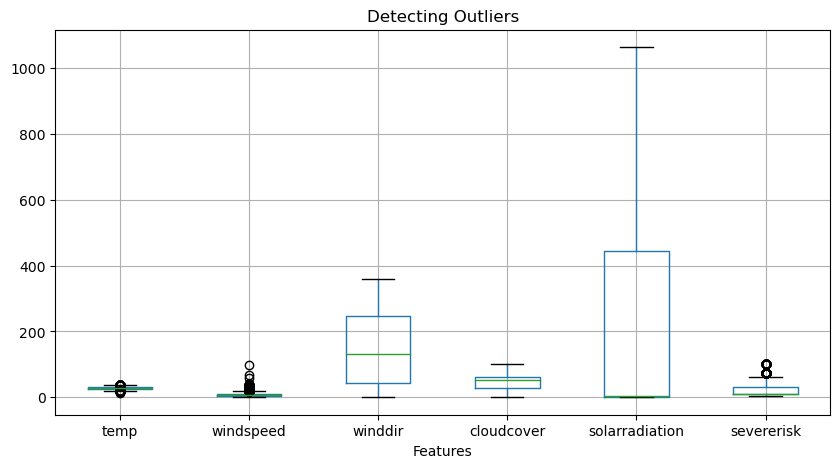

In [8]:
# use boxplot to find outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

df.boxplot(column=['temp','windspeed','winddir','cloudcover','solarradiation','severerisk'])

plt.title("Detecting Outliers")
plt.xlabel('Features')
plt.show()

In [9]:
# function to detect outliers in a column

def findOutliers(df,col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    
    outliersList = df.index[ (df[col] < lower_bound) | (df[col] > upper_bound)] 
    
    return outliersList

In [10]:
# find outliers in the columns

indexList = []
for col in ['temp','windspeed','winddir','cloudcover','solarradiation','severerisk']:
    indexList.extend(findOutliers(df,col))

In [11]:
# remove the outliers

def removeOutliers(df,outliersList):
    outliersList = sorted(set(outliersList))
    df = df.drop(outliersList)
    return df

df = removeOutliers(df,indexList)

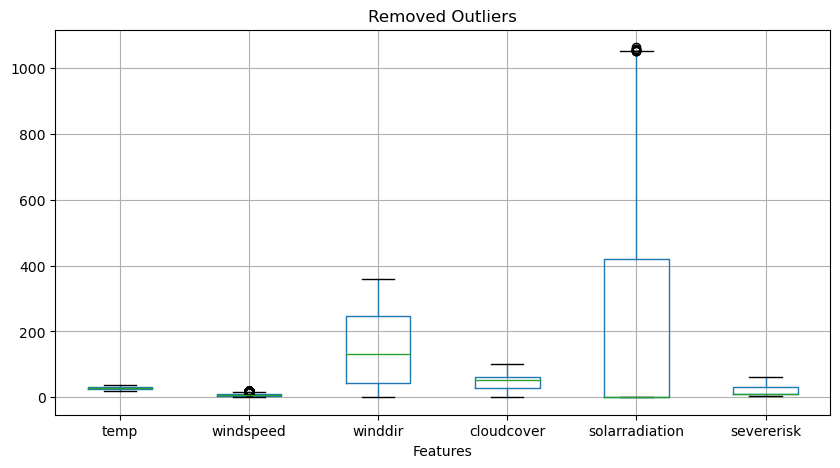

In [12]:
# use boxplot to find outliers
plt.figure(figsize=(10, 5))

df.boxplot(column=['temp','windspeed','winddir','cloudcover','solarradiation','severerisk'])

plt.title("Removed Outliers")
plt.xlabel('Features')
plt.show()

4.1.2 Data Transformation

In [13]:
df.set_index('datetime', inplace=True)

In [14]:
df.index

DatetimeIndex(['2023-09-01 00:00:00', '2023-09-01 01:00:00',
               '2023-09-01 02:00:00', '2023-09-01 03:00:00',
               '2023-09-01 04:00:00', '2023-09-01 05:00:00',
               '2023-09-01 06:00:00', '2023-09-01 07:00:00',
               '2023-09-01 08:00:00', '2023-09-01 09:00:00',
               ...
               '2024-09-25 14:00:00', '2024-09-25 15:00:00',
               '2024-09-25 16:00:00', '2024-09-25 17:00:00',
               '2024-09-25 18:00:00', '2024-09-25 19:00:00',
               '2024-09-25 20:00:00', '2024-09-25 21:00:00',
               '2024-09-25 22:00:00', '2024-09-25 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=136466, freq=None)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the 'icon' column and transform it to integers
df['icon'] = label_encoder.fit_transform(df['icon'])

# Display the transformed DataFrame
print(df[['icon']].head())

# If you want to see which number corresponds to each icon
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

                     icon
datetime                 
2023-09-01 00:00:00     5
2023-09-01 01:00:00     5
2023-09-01 02:00:00     6
2023-09-01 03:00:00     5
2023-09-01 04:00:00     5
{'clear-day': 0, 'clear-night': 1, 'cloudy': 2, 'fog': 3, 'partly-cloudy-day': 4, 'partly-cloudy-night': 5, 'rain': 6}


4.1.3 Data Balancing

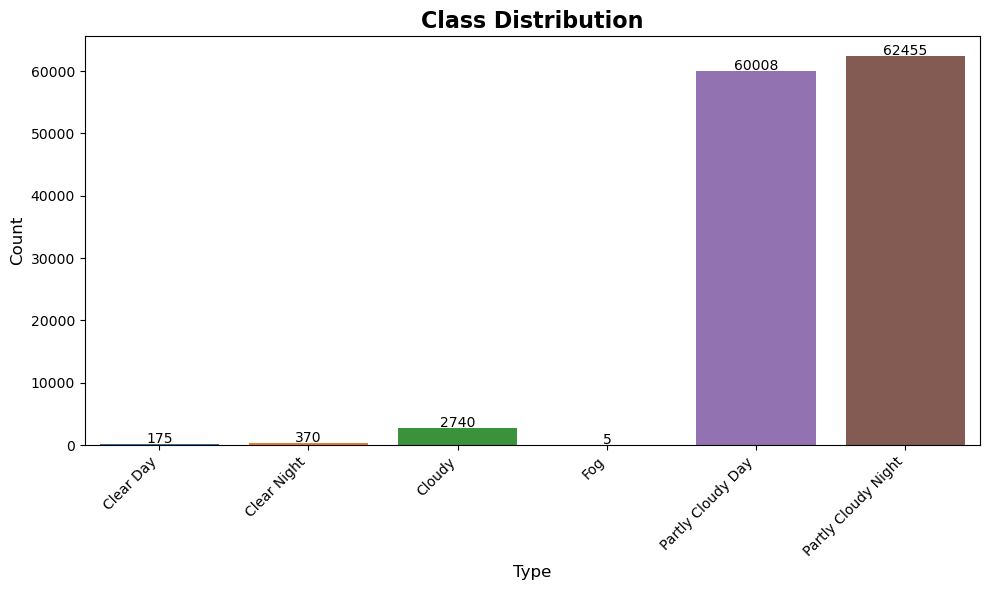

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature and target variable
X = df.drop(columns="icon") 
y = df["icon"]

icon_labels = ['Clear Day', 'Clear Night', 'Cloudy', 'Fog', 'Partly Cloudy Day', 
               'Partly Cloudy Night']

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visual appeal
ax = sns.barplot(x=icon_labels, y=[sum(y == i) for i in range(len(icon_labels))])

# Adding text labels on top of each bar
for i, v in enumerate([sum(y == i) for i in range(len(icon_labels))]):
    ax.text(i, v + 200, str(v), ha='center', fontsize=10)  

# Customize the plot
ax.set_title("Class Distribution", fontsize=16, fontweight="bold")
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('targetDistribution.jpg', bbox_inches='tight')
plt.show()

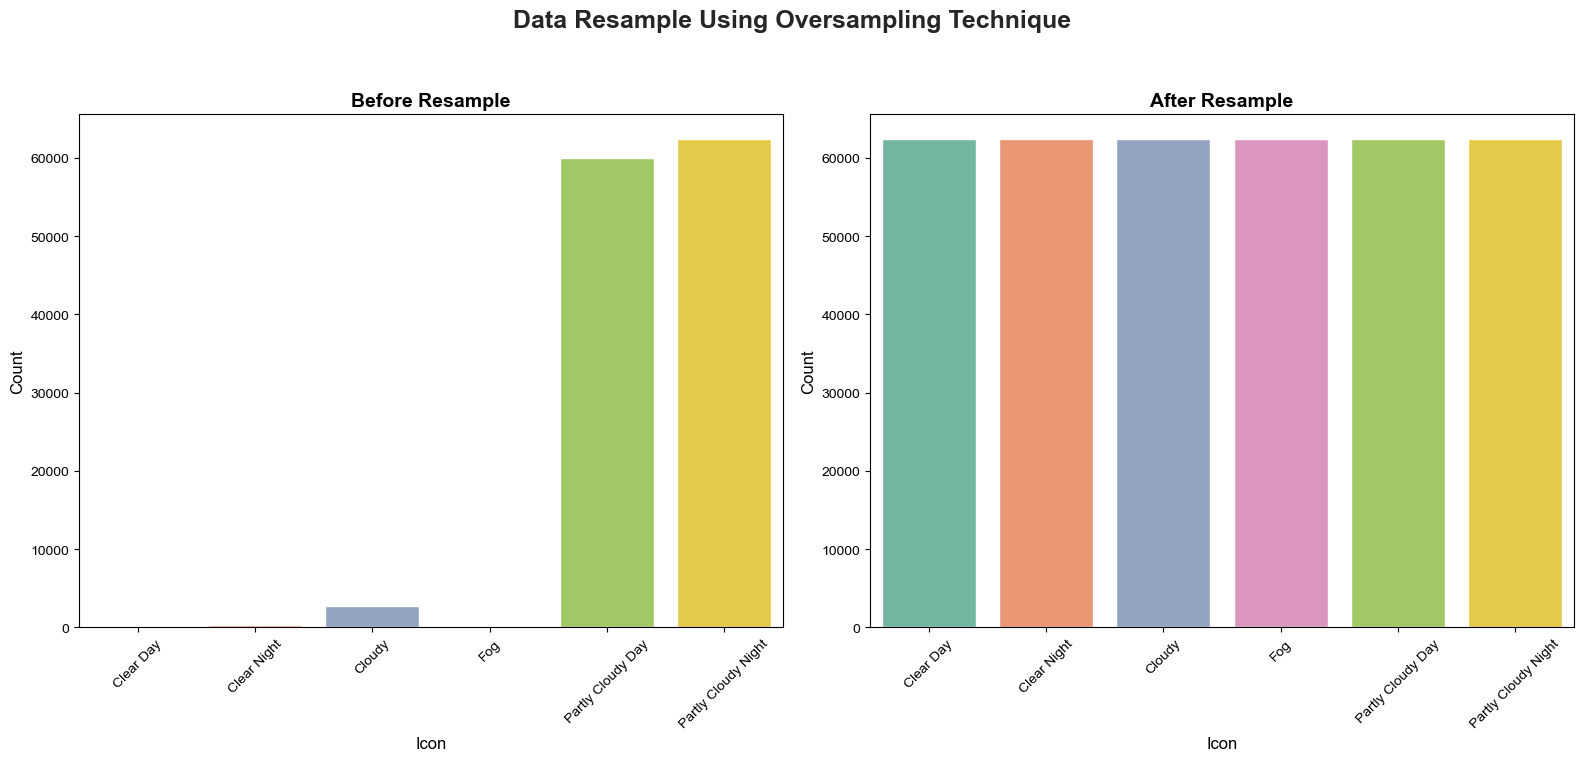

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE with fewer neighbors
sm = SMOTE(k_neighbors=1)  # Use k_neighbors instead of n_neighbors
X_resampled, y_resampled = sm.fit_resample(X, y)

# Plot before and after resampling (adjusted version)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Larger figure size for clarity

# Customize the style
sns.set(style="whitegrid")  # Add gridlines for better readability
palette = sns.color_palette("Set2", len(icon_labels))  # Use a color palette

# Plot before resampling
sns.barplot(x=icon_labels, y=[sum(y == i) for i in range(len(icon_labels))], ax=ax1, palette=palette)
ax1.set_title("Before Resample", fontsize=14, fontweight='bold')
ax1.set_xlabel('Icon', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45) 

# Plot after resampling
sns.barplot(x=icon_labels, y=[sum(y_resampled == i) for i in range(len(icon_labels))], ax=ax2, palette=palette)
ax2.set_title("After Resample", fontsize=14, fontweight='bold')
ax2.set_xlabel('Icon', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.suptitle("Data Resample Using Oversampling Technique", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('resampled.jpg', bbox_inches='tight')
plt.show()

4.2 Feature Selection

In [18]:
# splitting dataset into testing and training dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

4.2.1 Filter Method: Pearson Correlation

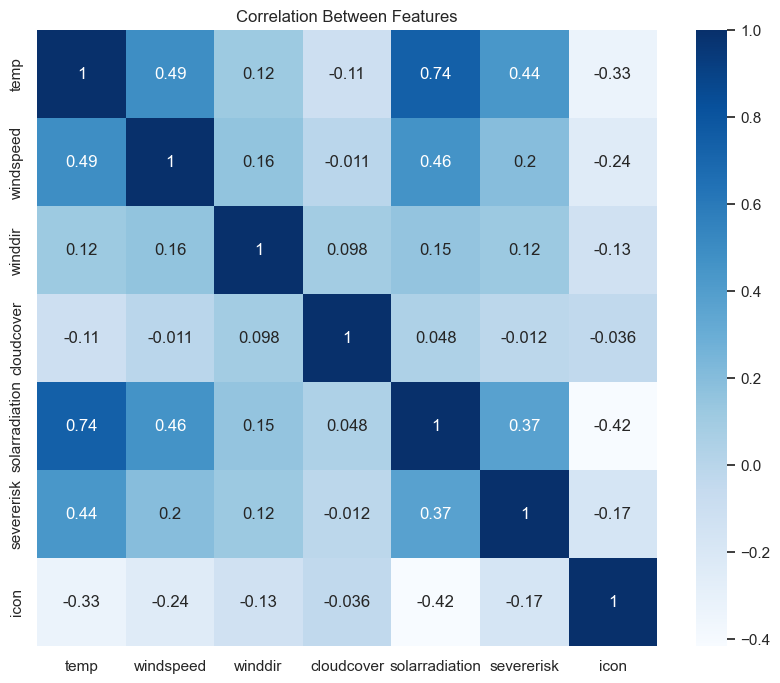

In [19]:
# Using Pearson Correlation 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10,8))

# Calculate the Pearson correlation
cor = df.corr(method='pearson')

# Create the heatmap, using 'fmt='.2g'' to avoid formatting issues with large values
sns.heatmap(cor, annot=True, fmt='.2g', cmap=plt.cm.Blues)

plt.title("Correlation Between Features")
plt.savefig('pearsonsCorrelation.jpg', bbox_inches='tight')
plt.show()

In [20]:
#Correlation with output variable
cor_target = abs(cor["icon"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print(relevant_features)

temp              0.330311
solarradiation    0.415676
icon              1.000000
Name: icon, dtype: float64


In [21]:
corr_vars = set()
corr_vars.update(relevant_features.index.unique(level=0))
all_vars = set(df.columns)
feature_cor = X.drop(columns=all_vars - corr_vars).columns

4.2.2 Embedded Method: Random Forest Importance

          Feature  Importance
4  solarradiation    0.519084
0            temp    0.183337
3      cloudcover    0.140388
2         winddir    0.067151
1       windspeed    0.065893
5      severerisk    0.024149


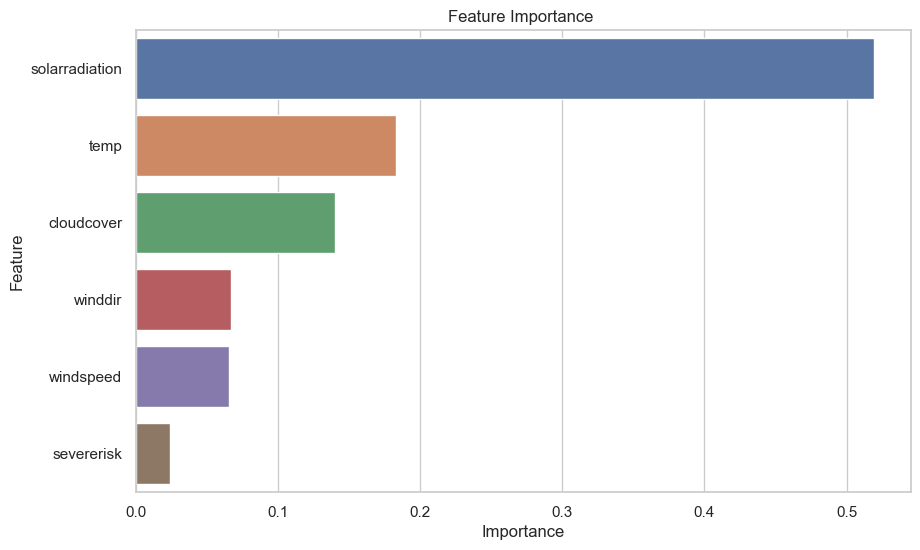

In [22]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance ')
plt.show()

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=10)
sel = SelectFromModel(clf)
sel.fit(X_train,y_train)
sel.get_support()
feature_sel = X.columns[(sel.get_support())]

print("Selected Feature:")
for i in range (0,len(feature_sel)):
    print(i+1,'-',feature_sel[i])

Selected Feature:
1 - solarradiation


4.2.3 RFE

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

min_features=1
rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=10),
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features,
)
rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


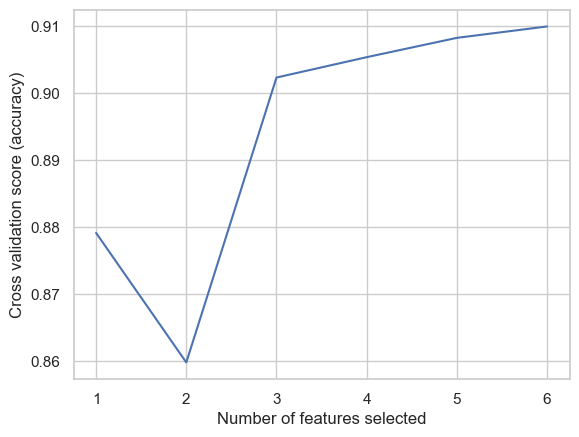

In [25]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")

# Using cv_results_ to get the mean cross-validation scores
plt.plot(
    range(min_features, len(rfecv.cv_results_['mean_test_score']) + min_features),
    rfecv.cv_results_['mean_test_score']
)

plt.savefig('rfe.jpg', bbox_inches='tight')
plt.show()

In [26]:
# display selected features
cols = list(X.columns)
feature_rfe = []
for i in range(X.shape[1]):
    if rfecv.ranking_[i] == 1:
        feature_rfe.append(cols[i])
print(feature_rfe)

['temp', 'windspeed', 'winddir', 'cloudcover', 'solarradiation', 'severerisk']


4.2.4 Feature Selection Method Comparison

In [27]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np

#Compare accuracy using each feature selection method
clf = RandomForestClassifier(random_state=10)

# Accuracy of correlation method
clf.fit(X_train[feature_cor], y_train)
y_pred = clf.predict(X_test[feature_cor])
cor_accuracy = metrics.accuracy_score(y_test, y_pred)

# Accuracy of Random Forest
clf.fit(X_train[feature_sel], y_train)
y_pred = clf.predict(X_test[feature_sel])
sel_accuracy = metrics.accuracy_score(y_test, y_pred)

# Accuracy of Random Forest
clf.fit(X_train[feature_rfe], y_train)
y_pred = clf.predict(X_test[feature_rfe])
rfe_accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy of each method
print("Accuracy for Pearson Correlation:", cor_accuracy)
print("Accuracy for Random Forest:", sel_accuracy)
print("Accuracy for RFE:", rfe_accuracy)

Accuracy for Pearson Correlation: 0.8616179380083535
Accuracy for Random Forest: 0.8805231919103099
Accuracy for RFE: 0.9133875577049901


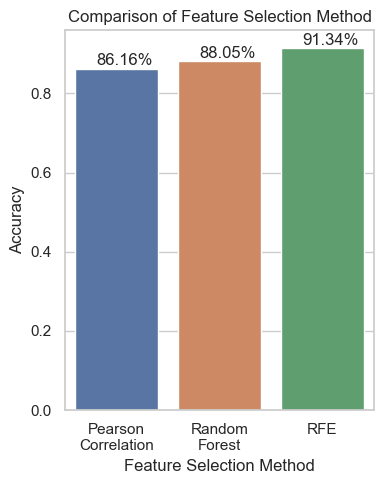

In [28]:
# plotting the comparison between the feature selection method

plt.subplots(figsize=(4,5))

method = ['Pearson\nCorrelation','Random\nForest','RFE']
accuracy = [cor_accuracy,sel_accuracy,rfe_accuracy]

ax = sns.barplot(x=method,y=accuracy)
ax.set_xlabel('Feature Selection Method')
ax.set_ylabel('Accuracy')
for i,v in enumerate(accuracy):
    ax.text(i - .2,v + .01,"{:.2%}".format(v))

plt.title("Comparison of Feature Selection Method")
plt.tight_layout()
plt.show()

4.3 Machine Learning Model Comparison

In [29]:
# update X_train,X_test
X_train = X_train[feature_rfe]
X_test = X_test[feature_rfe]

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)

nb_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(Naive Bayes):","{:.2%}".format(nb_accuracy))

Accuracy(Naive Bayes): 85.97%


In [31]:
from sklearn.model_selection import GridSearchCV

# Assuming nb_model is your GaussianNB model
nb_model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, 
                           cv=4, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the GridSearchCV object
print(grid_search)


Fitting 4 folds for each of 100 candidates, totalling 400 fits
GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)


In [32]:
grid_search.best_params_, grid_search.best_score_

({'var_smoothing': 0.0004328761281083057}, 0.8686567984464881)

In [33]:
optimized_nb = grid_search.best_estimator_
optimized_nb.fit(X_train, y_train)

y_pred = optimized_nb.predict(X_test)
nb_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(Naive Bayes):","{:.2%}".format(nb_accuracy))

Accuracy(Naive Bayes): 87.10%


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=10)
gb_model.fit(X_train,y_train)
y_pred = gb_model.predict(X_test)

gb_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(GB Decision Tree):","{:.2%}".format(gb_accuracy))

Accuracy(GB Decision Tree): 91.01%


from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,110,10)

param_grid = {
    'max_features': max_features_range,
    'n_estimators': n_estimators_range
}

grid_search = GridSearchCV(estimator = gb_model, param_grid = param_grid, 
                          cv = 4, n_jobs=-1, verbose = 2)

grid_search.fit(X_train, y_train)

In [35]:
grid_search.best_params_, grid_search.best_score_

({'var_smoothing': 0.0004328761281083057}, 0.8686567984464881)

In [36]:
optimized_gb = grid_search.best_estimator_
optimized_gb.fit(X_train, y_train)

y_pred = optimized_gb.predict(X_test)
gb_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(GB Decision Tree):","{:.2%}".format(gb_accuracy))

Accuracy(GB Decision Tree): 87.10%


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(Random Forest):","{:.2%}".format(rf_accuracy))

Accuracy(Random Forest): 91.34%


In [38]:
from sklearn.model_selection import GridSearchCV

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,110,10)

param_grid = {
    'max_features': max_features_range,
    'n_estimators': n_estimators_range
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 4, n_jobs=-1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             verbose=2)

In [39]:
grid_search.best_params_, grid_search.best_score_

({'max_features': 2, 'n_estimators': 100}, 0.9100868354523138)

In [40]:
optimized_rf = grid_search.best_estimator_
optimized_rf.fit(X_train, y_train)

y_pred = optimized_rf.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy(Random Forest):","{:.2%}".format(rf_accuracy))

Accuracy(Random Forest): 91.34%


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimized_nb, X, y, cv=4)
nb_accuracy_mean = scores.mean()

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimized_gb, X, y, cv=4)
gb_accuracy_mean = scores.mean()

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimized_rf, X, y, cv=4)
rf_accuracy_mean = scores.mean()

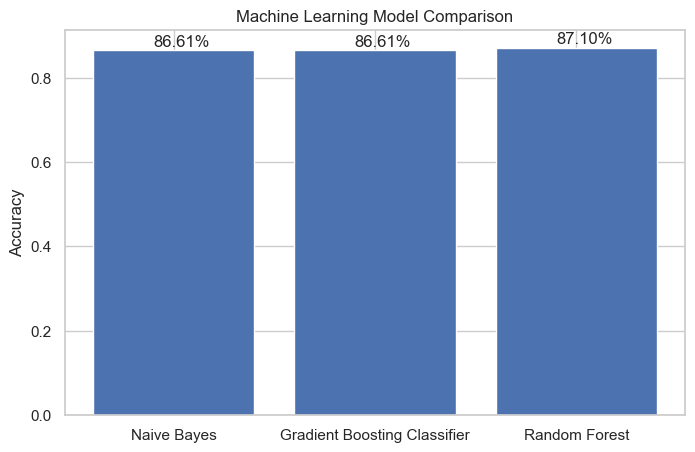

In [44]:
model = ['Naive Bayes','Gradient Boosting Classifier','Random Forest']
accuracy = [nb_accuracy_mean,gb_accuracy_mean,rf_accuracy_mean]

plt.figure(figsize=(8,5))

plt.bar(model, accuracy)
plt.title('Machine Learning Model Comparison')
plt.ylabel('Accuracy')
for i,v in enumerate(accuracy):
    plt.text(i - .1,v + .01,"{:.2%}".format(v))

plt.show()

In [48]:
# save the model to disk
import pickle

# filename = 'model\predictive_model.sav'
filename ='model\path_to_model.pkl'

tuple_objects = (optimized_rf, rf_accuracy_mean)

# Save tuple
pickle.dump(tuple_objects, open(filename, 'wb'))

In [46]:
#Save data in excel
#df.to_csv('cleaned_data.csv', index=False)